# Exercise 1 - Discrete random variable

The probability distribution function of a discrete variable k is given by the following:
p(k) = k/ 15  with k = 1, 2, 3, 4, 5
0 otherwise
1) write the R probability functions for the probability density and cumulative distribution functions,
following the R naming convention
2) produce two plots showing the pdf and cdf, separately
3) compute, using R, the mean value and variance of the probability distribution
4) compute, using R, the expected value E [k (6 − k)]=E[k]*6-E[k*k]
5) write the R function that allows to sample random numbers from the probability distribution
6) using the implemented function (point (5)), sample 10 5 random numbers from this distribution and
plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize
properly the plots with random numbers)

In [1]:
library(ggplot2)
library(RColorBrewer)
library(triangle)

#### 1.
Write the R probability functions for the probability density and cumulative distribution functions, following the R naming convention.
#### 2.
Produce two plots showing the pdf and cdf, separately

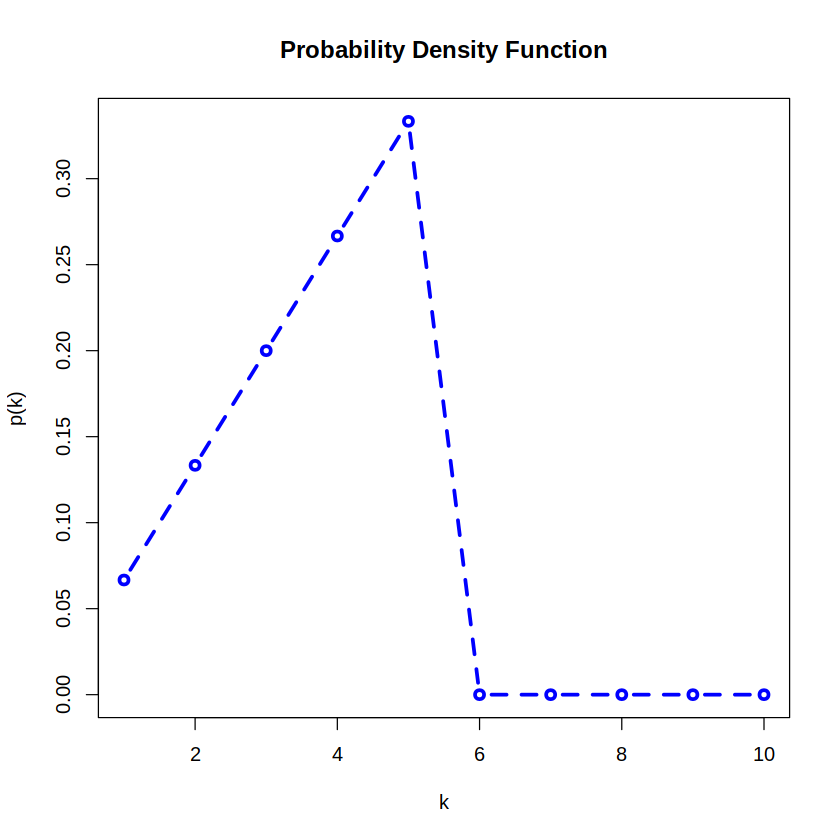

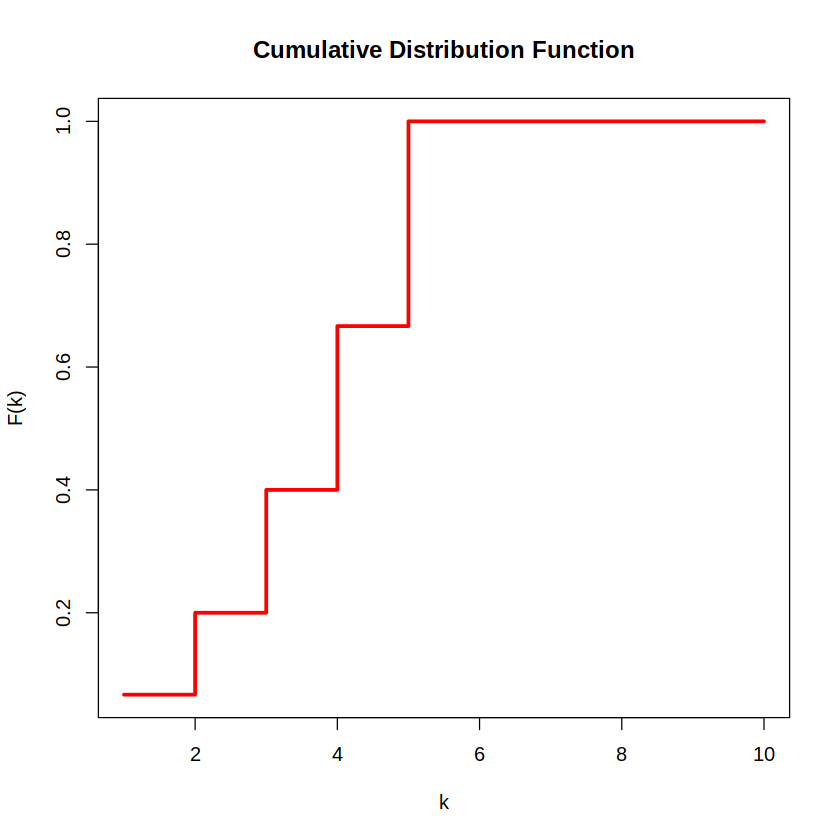

In [3]:
#define the pdf
pdf <- function(k) {
  ifelse(k >= 1 & k <= 5, k/15, 0)
}

cdf <- function(x) {
  sum(pdf(1:x))
}

# create a sequence of values for k
k <- 1:10

# plot the PDF
par(mfrow=c(1,1.5))
prob <- pdf(k)
plot(k, prob, type="b", lty=2, lwd=3, col="blue", xlab="k", ylab="p(k)", main="Probability Density Function")

# plot the CDF
cum_prob <- sapply(k, cdf)
plot(k, cum_prob, type="s", lwd=3, col="red", xlab="k", ylab="F(k)", main="Cumulative Distribution Function")

#### 3.
Compute, using R, the mean value and variance of the probability distribution.
To compute the mean value and variance of the probability distribution in R, we can use the following formulas:

Mean = ∑[k * p(k)]

Variance = ∑[(k - Mean)^2 * p(k)]




In [4]:
# Define the values of k
x <- 1:5

# create vector for probability
probability <- pdf(x)

mean_value<-sum(x*probability)
variance<-(sum(x*x*probability)-sum(x*probability)*sum(x*probability))

cat("Mean: ", mean_value, "\n")
cat("Variance: ", variance, "\n")

Mean:  3.666667 
Variance:  1.555556 


#### 4.
Compute, using R, the expected value $E [k (6 − k)]=E[k]·6-  E[k^2]$

In [5]:
# create vector for value
x <- 1:5

# Compute the expected value of k
mean_k <- sum(x * pdf(x))

# Compute the expected value of k^2
mean_k2 <- sum(x^2 * pdf(x))

# Compute E[k(6-k)]
mean <- mean_k * 6 - mean_k2

cat("Expected value of k(6-k): ", mean, "\n")

Expected value of k(6-k):  7 


#### 5.
Write the R function that allows to sample random numbers from the probability distribution

#### 6.
Using the implemented function, sample $10^5$ random numbers from this distribution and
plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize
properly the plots with random numbers)

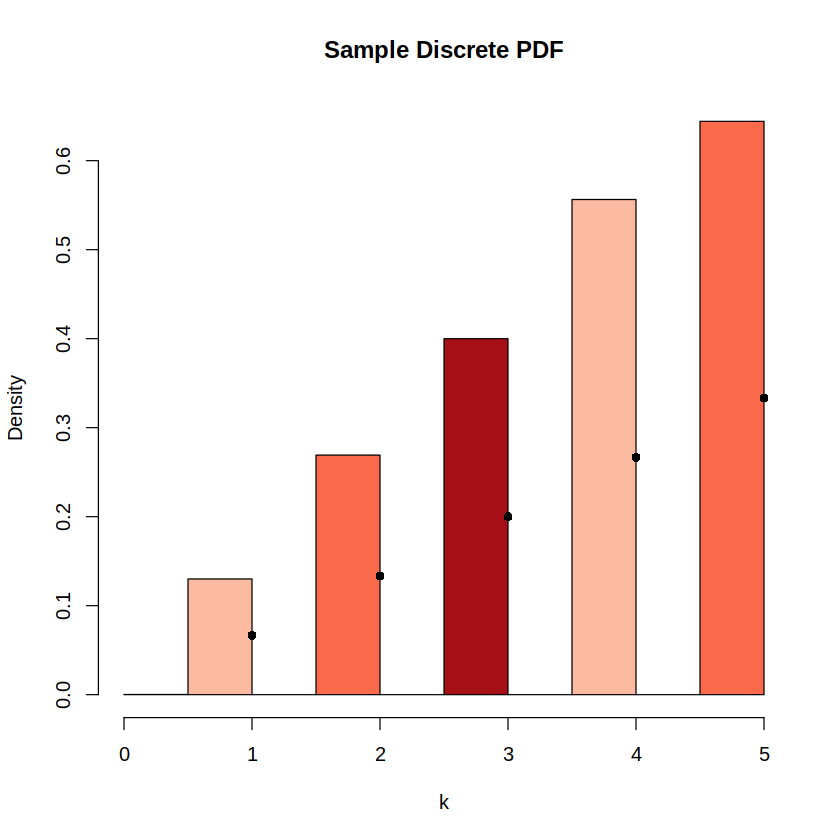

In [19]:
# create a sequence of values for k and compute the cdf and the pdf
k <- 1:5
cum_prob <- sapply(k, cdf)
prob<-pdf(k)

iter<- 0
generator <- function(number_points=10000){
    data1 <- numeric(number_points)#initialize data1 as a vector of length number_points
    while (iter < number_points) {
    u <- runif(1)                                          #generate a rnd number in (0,1)
    index <- which(u < cum_prob)[1]  #index of the interval in the pdf that contains u
    data1[iter]<-index                             #put that index (that can be 1,2,3,4 or 5) in the gen.
    iter<- iter+1                                         #update index
    }
    data1
}

blues_pal <- brewer.pal(6, "Reds")
hist(generator(),breaks = seq(min(generator()), max(generator()), length.out = 11), freq=FALSE, main=("Sample Discrete PDF"),plot = TRUE,xlab="k", ylab="Density",col = blues_pal)
points(k,prob,col="Black",pch=16)

# Exercise 2 - Continuous random variable


<span style="font-size:larger;"> a)</span> Consider the triangular distribution, in the interval (a, b):
 plot the function, given the interval (a, b) 

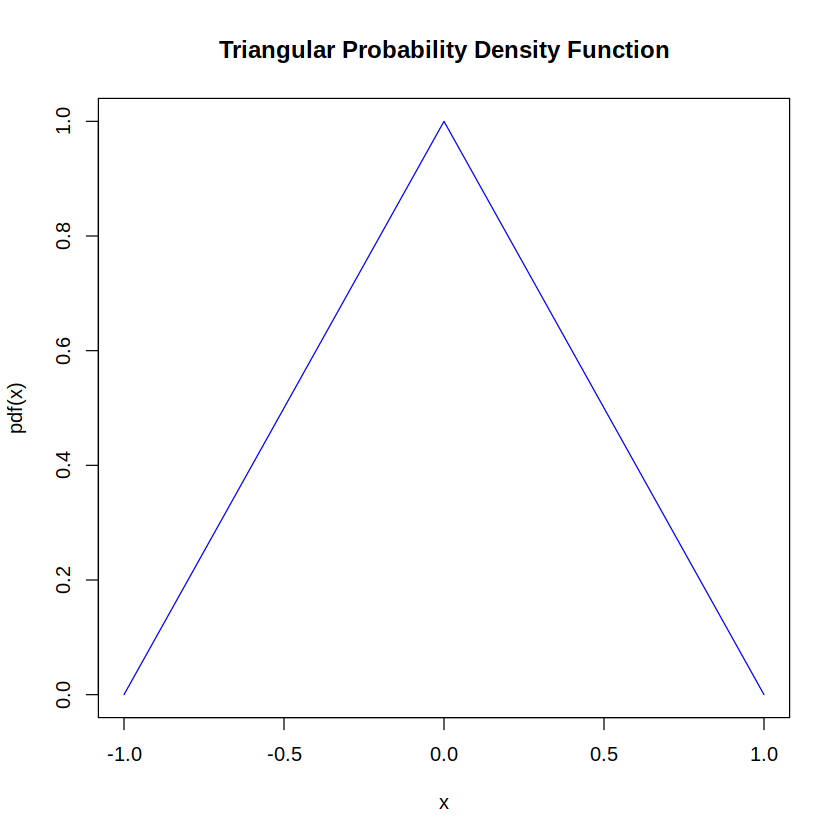

In [6]:
#define the values of the interval
a <- -1
b <- 1
c <- 0

#define the triangular pdf 
triangular_pdf <- function(a,b,c,x) {
  ifelse(x >= a & x < c, 2*(x-a)/((b-a)*(c-a)),                #if the first condition is not true do this :
      ifelse(x >= c & x <= b, 2*(b-x)/((b-a)*(b-c)), 0))    #if it is not true sent to 0
}

#define a sequence of points to be plotted
X<- seq(a,b,0.01)

#profduce the plot of the triangular pdf
plot(X, triangular_pdf(a,b,c,X), type="l", lty=1, lwd=1, col="blue", xlab="x", ylab="pdf(x)", main="Triangular Probability Density Function")

b) write an algorithm to generate random numbers from the triangular distribution


In [7]:
#define the generator (acceptance or rejection) of triangular distribuited points
triangular_generator <- function(n, pdf, n_points_unif) {
    n.accepts     <- 0
    data <- rep(NA, n)
    while (n.accepts<n){
        u <- runif(1,0,1)             #1 single rnd number between 0 and 1 from a uniform distribution
        y <- n_points_unif(1)   #n-rnd uniform numbers
        if (u < pdf(a,b,c,y)) {     #if the random number is 'under' the pdf it's accepted
            n.accepts <- n.accepts+1
            data[n.accepts] = y
        }
    }
    data
}

#this function generate a sequence of rnd distribuited points in (a,b)
n_points_unif <- function(n) runif(n,a,b)                   

c) generate 10 4 random number from the distribution, show them in an histogram and superimpose
the analytical curve

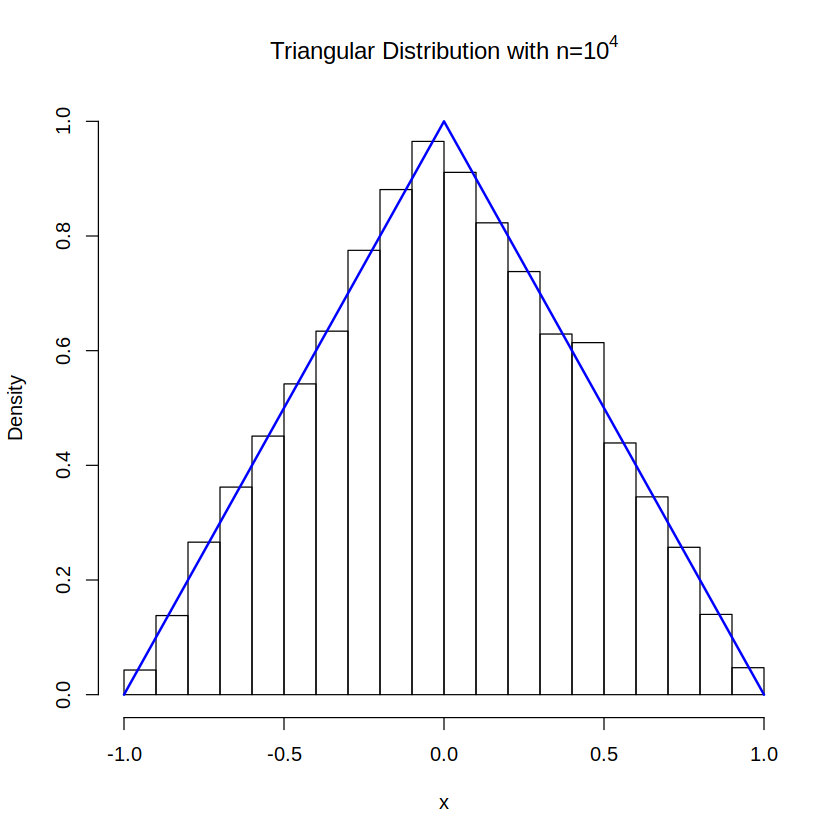

In [9]:
#numbers of points to be sampled
n <- 10**4

#sample this points
x <- triangular_generator(n, triangular_pdf,n_points_unif)

#plot the hist
hist(x, breaks = 20, freq = FALSE, main = expression(paste("Triangular Distribution with n=", 10^4)), ylim=c(0,1), xlab = "x", ylab = "Density")

#superimpose the triangular pdf
lines(X, triangular_pdf(a,b,c,X), type="l", lty=1, lwd=2, col="blue", ylim=c(0,1), xlab="x", ylab="pdf(x)", main="Triangular Probability Density Function")

# Exercise 3

 the waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an
exponential pdf with rate 1/30

A) simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram

B) what is the probability that a person will wait for less than 12 minutes ?

C) evaluate the average waiting time from the simulated data and compare it with the expected value

(calculated from theory and by manipulating the probability distributions using R)

D) what is the probability for waiting more than one hour before being received ?

#### A)
Simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram


In [24]:
#set seed for reproducibility
set.seed(1234)

#define variables 
n <- 60
x_dexp <- seq(0, 120, by = 0.1) 
rate <- 1/30

# Define the exponential pdf 
waiting_times <- rexp(n, rate) 

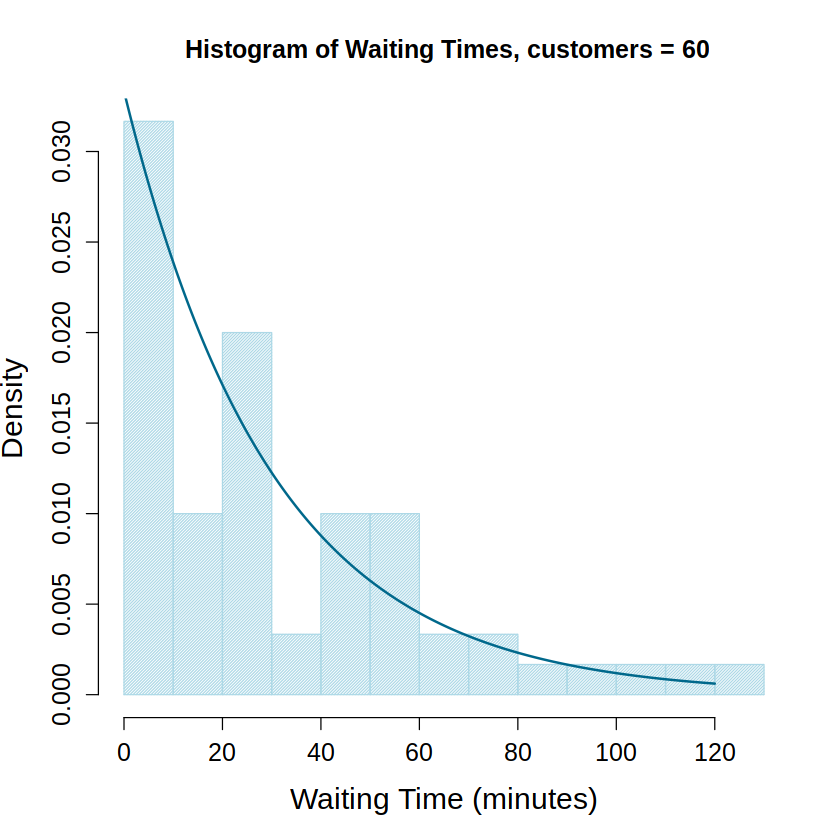

In [25]:
#Plot the relative histogram 
#ylim=c(0,20)
hist(waiting_times, breaks = 15, freq = FALSE,  density= 60,col = "lightblue",main = sprintf (" Histogram of Waiting Times, customers = %d", n), xlab = "Waiting Time (minutes)",cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5)
lines(x_dexp, dexp(x_dexp,rate), col = "deepskyblue4", lwd = 2)

#### B) 
What is the probability that a person will wait for less than 12 minutes ?

The R function that allows us to calculate the probabilities of a random variable 'waiting time' taking values lower than 12min is the pexp function:

In [24]:
# Probability of waiting less than 12 minutes
p <- pexp(12, rate = 1/30)
cat("The probability of waiting less than 12 min is : ", round(p*100,digits=1), "%\n")

The probability of waiting less than 12 min is :  33 %


#### C)
Evaluate the average waiting time from the simulated data and compare it with the expected value


In [15]:
# average waiting time from the simulated data
average_sim <- mean(waiting_times)        #waiting time = simulated data
cat("The average waiting time from the simulated data is : ", round(average_sim, digits = 0) , "minutes\n")

# expected value of average waiting time 
cat("The average waiting time from theory is : ", 1/rate , "minutes\n")
cat("The two values are not exactly the same due to random variation, but they are close to each other, which indicates that the simulation is valid.")

The average waiting time from the simulated data is :  32 minutes
The average waiting time from theory is :  30 minutes
The two values are not exactly the same due to random variation, but they are close to each other, which indicates that the simulation is valid.

#### D)
What is the probability for waiting more than one hour before being received ?

In [19]:
# Probability of waiting more than one hour
p <- pexp(60, rate = 1/30)
cat("The probability of waiting more than 1 hour is : ",  round((1-p)*100, digits =1), "%\n")

The probability of waiting more than 1 hour is :  13.5 %


# Exercise 4 - Multiple choices exams

• the final exam of a course is given to the students in the format of a multiple choice written test:
for each questions there are five possible alternatives

• a student either knows the answer, or selects randomly the answer among the five possible choices

• assuming p = 0.7 the probability that the student knows the answer, once a correct answer is given,
what it the probability that the student really knew the correct answer ?

<br>

We can use Bayes' theorem to calculate the probability that the student knew the correct answer, given that a correct answer was given: 
- let A be the event that the student knows the answer; <br>
- and B be the event that a correct answer was given.<br>

We want to calculate P(A|B), the probability that the student knew the answer given that a correct answer was given.
We will use the following formulas: 
- Bayes' theorem: P(A|B) = P(B|A) * P(A) / P(B) <br>
- P(B) = P(B|A) * P(A) + P(B|not A) * P(not A) <br>

In [27]:
# DEFINING KNOWN PROBABILITIES 

# P(A) Probability of knowing the answer (event A)
p_A <- 0.7

# P(B|not A): Probability of selecting the correct answer at random 1/5
p_B_nA <- 0.2

# P(B|A) Probability of selecting the correct answer if the student knows it 
p_B_A <- 1 #if the student knows the answer, he will give the correct answer with certainty

In [49]:
# COMPUTE P(B) --> P(B) = P(B|A) * P(A) + P(B|not A) * P(not A) 
p_B <- p_B_A * p_A + p_B_nA*(1-p_A)

#COMPUTE P(A|B)  --> P(A|B) = P(B|A) * P(A) / P(B) 
p_A_B <- p_B_A*p_A/p_B

cat('The probability that the student knew the answer given that a correct answer was given is ', round(p_A_B*100, 0), '% \n')

The probability that the student knew the answer given that a correct answer was given is  92 % 


# Exercise 5 - Waiting time

- starting from 5:00 in the morning, every half an hour there is a train from Milano Centrale to Roma Termini. We assume there is always an available seat on a train leaving from Milano

- assuming a person arrives at a random time between 10:45 and 11:45 and compute the probability that she has to wait

 a) at most 10 minutes <br>
 b) at least 15 minutes<br>
 c) what is the average time spent waiting ?<br>

In [43]:
cat('Testing the model and the minpositive function \n \n')
# Define the train timetable
leave_dist <- seq(5,12,0.5)
cat('Arrival times of the train (h): ', leave_dist, '\n\n')

# Define the arrival time distribution
arrive_dist <- runif(1, min = 10.75, max = 11.75)
cat('Random costumer arrival time (h): ', arrive_dist, '\n\n')

#Define the min waiting time
minpositive = function(x) min(x[x > 0]) #return is the smallest positive number
waiting_time <- minpositive(arrive_dist-leave_dist) 
cat('The waiting time is: ', waiting_time, 'hours')

Testing the model and the minpositive function 
 
Arrival times of the train (h):  5 5.5 6 6.5 7 7.5 8 8.5 9 9.5 10 10.5 11 11.5 12 

Random costumer arrival time (h):  10.85077 

The waiting time is:  0.350769 hours

In [44]:
number_points <- 10000
data <- numeric(number_points)
leave_dist <- seq(5,12,0.5)

count_a <-0 #fraction of people who waited at most 10 minutes 
count_b<-0 # fraction of people who waited  at least 15 minutes 

for (x in 1:number_points) {
    arrive_dist <- runif(1, min = 10.75, max = 11.75)
    waiting_time <- minpositive(arrive_dist-leave_dist) 
    data[x] <- waiting_time
    if (waiting_time <= 10/60) {
        count_a <- count_a+1/number_points
    }
    if (waiting_time > 15/60) {
        count_b <- count_b+1/number_points
    }
} 

In [46]:
cat('The fraction of people who waited at most 10 minutes is:  ', count_a, '% \n')
cat('The fraction of people who waited at least 15 minutes is:  ', count_b, '% \n')
cat('The average time spent waiting is: ', round(mean(data)*60, 2), 'min')

The fraction of people who waited at most 10 minutes is:   0.3287 % 
The fraction of people who waited at least 15 minutes is:   0.501 % 
The average time spent waiting is:  15.04 min

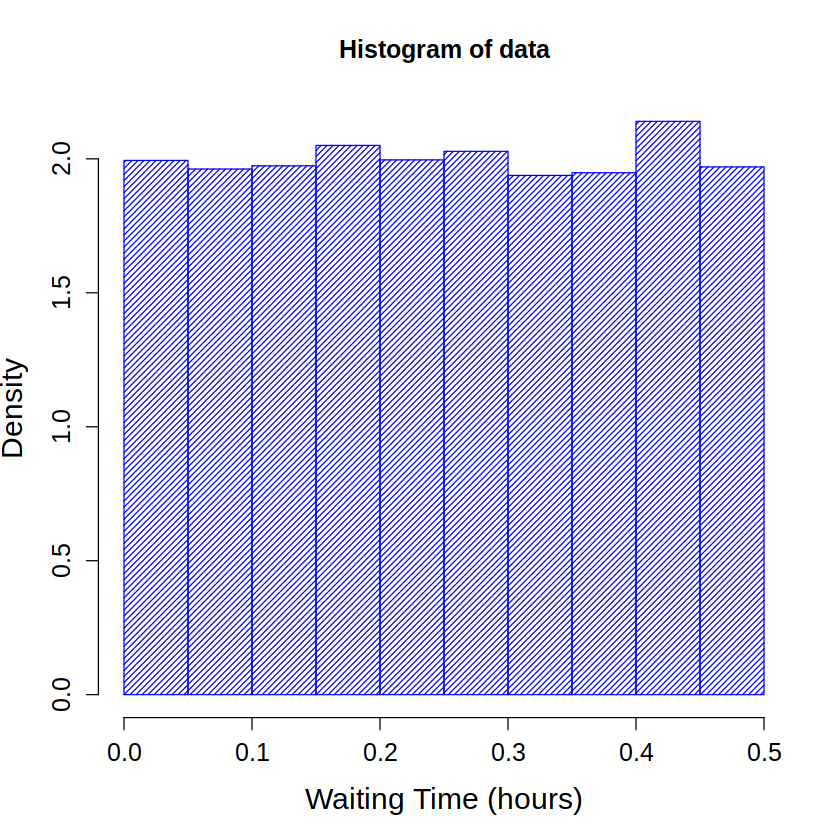

In [30]:
hist(data, breaks = 15,  density= 30, freq=FALSE, col = "blue", xlab = "Waiting Time (hours)",cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5)

# Exercise 6 - stock investment

• the annual return rate for a specific stock on the market is a normal variable with a 10% mean and
a 12% standard deviation. Mr X decides to buy 200 share of that specific stock at a price of 85e per share:

• what is the probability that after a year his net profit from the investment is at least 800e ?

• (suppose there are no transaction costs and that there are no annual dividend for the stock)

In [47]:
mean_return <- 0.1    # mean return rate
sd_return <- 0.12     # standard deviation of return rate
num_shares <- 200     # number of shares
price_per_share <- 85 # price per share

#set seed for reproducibility
set.seed(1234)

#define variables 
n <- 1e6
mean <-   num_shares * price_per_share * (1 + mean_return)
std <- sd_return*num_shares*price_per_share

# Define the normal pdf 
returns <- rnorm(n, mean, std) 
count <-sum(returns >=(num_shares * price_per_share+800)) #prob of net profit being >=800
cat("The probability of Mr. X's net profit being at least 800 euros after one year is :", round(count/n*100, digits=2), "%")

The probability of Mr. X's net profit being at least 800 euros after one year is : 67.01 %